In [34]:
from descriptors.acsf import acsf

r_cut = 15
obj = acsf.TwoBodyACSF(['O','O'],r_cutoff=r_cut,nb_param_pairs=10)
params_wip = obj.get_two_body_parameters()

In [35]:
params = []
for param in params_wip:
    param.append(r_cut)
    param = [float(x) for x in param]
    params.append(param)
print(params)

[[6.629, 1.5, 15.0], [4.183, 1.888, 15.0], [2.639, 2.377, 15.0], [1.665, 2.993, 15.0], [1.051, 3.768, 15.0], [0.6629, 4.743, 15.0], [0.4183, 5.972, 15.0], [0.2639, 7.518, 15.0], [0.1665, 9.464, 15.0], [0.1051, 11.91, 15.0]]


<ipython-input-36-f6fbd9394af1>:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


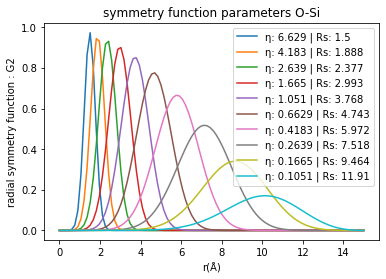

In [36]:
from descriptors.acsf.sf_function import SymmetryFunction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use({'figure.facecolor':'white'})
def plot_sf(sf_parameters, bond):
    r_cut_list = [];
    for param in sf_parameters:
        r_cut_list.append(param[-1])
    r_cut = max(r_cut_list)
    acsf = SymmetryFunction()
    r_ij = np.linspace(0, r_cut, 100)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title(f'symmetry function parameters {bond}')
    ax.set_xlabel(f'r(Å)')
    ax.set_ylabel(f'radial symmetry function : G2')
    for param in sf_parameters:
        ax.plot(r_ij,
                [acsf.radial_symmetry_function_2(eta=param[0], r_ij=k, r_shift=param[1], r_cutoff=param[2]) for k in
                 r_ij], label=f'η: {param[0]} | Rs: {param[1]}')
    ax.legend()
    fig.show()

# params = [
#     [14.92, 1.0, 10.0],
#     [9.411, 1.259, 10.0],
#     [5.938, 1.585, 10.0],
#     [3.747, 1.995, 10.0],
#     [2.364, 2.512, 10.0],
#     [1.492, 3.162, 10.0],
#     [0.9411, 3.981, 10.0],
#     [0.5938, 5.012, 10.0],
#     [0.3747, 6.31, 10.0],
#     [0.2364, 7.943, 10.0]
# ]
plot_sf(params,'O-Si')